### Aula 2: Exercícios

Para estes exercícios, iremos utilizar duas bases:

1) base fictícia de funcionários criada por cientistas de dados da IBM.

**Variáveis:**
- **Age:** Idade
- **Attrition:** Se saiu da empresa (Sim ou não)
- **BusinessTravel:** Frequência de viagens a trabalho
- **DailyRate:** Custo do funcionário por dia
- **Department:** Departamento
- **DistanceFromHome:** Distância do trabalho até a casa do funcionário
- **Education:** Nível de educação:
    - 1: 'Below College'
    - 2: 'College'
    - 3: 'Bachelor'
    - 4: 'Master'
    - 5: 'Doctor'
- **EducationField:** Área da educação
- **EmployeeNumber:** ID do funcionário
- **EnvironmentSatisfaction:** Satisfação com o ambiente de trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **Gender:** Gênero
- **HourlyRate:** Valor/hora
- **JobInvolvement:** Nível de envolvimento com o trabalho (psicologica e emocionalmente):
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **JobLevel:** Nível do funcionário
- **JobRole:** Cargo
- **JobSatisfaction:** Nível de satisfação com o trabalho:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **MaritalStatus:** Estado Civil
- **NumCompaniesWorked:** Número de empresas que já trabalhou
- **PercentSalaryHike:** Aumento salarial (%)
- **PerformanceRating:** Nível de performance:
    - 1: 'Low'
    - 2: 'Good'
    - 3: 'Excellent'
    - 4: 'Outstanding'
- **RelationshipSatisfaction:** Satisfação de relacionamento:
    - 1: 'Low'
    - 2: 'Medium'
    - 3: 'High'
    - 4: 'Very High'
- **TotalWorkingYears:** Número de anos trabalhados
- **TrainingTimesLastYear:** Número de treinamentos no ano anterior
- **WorkLifeBalance:** Equilíbrio da vida profissional
    - 1: 'Bad'
    - 2: 'Good'
    - 3: 'Better'
    - 4: 'Best'
- **YearsAtCompany:** Anos na empresa
- **YearsInCurrentRole:** Anos na posição atual
- **YearsSinceLastPromotion:** Anos desde a última promoção
- **YearsWithCurrManager:** Anos com o mesmo gestor

2) Base de dados de casos e óbitos de covid no estado de SP.

- **nome_munic:** Nome do município
- **codigo_ibge:** Código do município no IBGE (7 dígitos)
- **casos_novos:** Casos novos registrados na data
- **obitos_novos:** Óbitos novos registrados na data
- **nome_drs:** Nome do Dpto. Regional de Saúde
- **cod_drs:** Código do Dpto. Regional de Saúde
- **pop:** População Estimada (fonte: SEADE)
- **pop60:** População acima de 60 anos (fonte: SEADE)
- **ano_mes:** Ano e mês dos dados

In [26]:
import pandas as pd
import numpy as np

In [27]:
df1 = pd.read_csv('./data/IBM_Employees.csv')

In [28]:
df2 = pd.read_csv('./data/dados_covid_sp_20.csv')

## Exercício 1:
Utilizando a base de dados de covid:

**a)** Faça um gráfico de barras mostrando o total de óbitos (considerando todos os meses) para todos os DRS, excluindo a Grande São Paulo. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom e intercale as barras com as cores 'red' e 'green'.

In [29]:
df2.head()

,nome_munic,codigo_ibge,nome_drs,cod_drs,pop,pop_60,ano_mes,casos,casos_novos,obitos,obitos_novos
0,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-02,0,0,0,0
1,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-03,0,0,0,0
2,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-04,28,5,0,0
3,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-05,717,34,27,2
4,Adamantina,3500105,Marília,5.0,33894.0,7398.0,2020-06,163,3,10,1


Text(0.5, 1.0, 'TOTAL DE ÓBITOS POR DEPARTAMENTO DE SAÚDE')

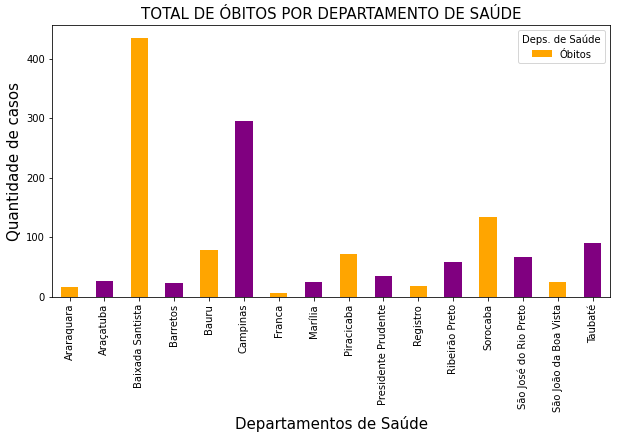

In [85]:
table = df2[df2['nome_drs']!='Grande São Paulo']
ax = table.groupby(['nome_drs'], as_index=False).sum().plot(x='nome_drs', y='obitos_novos', kind='bar', figsize=(10,5), 
                                                            title='Óbitos por Departamentos de Saúde', 
                                                            color=['orange','purple'], label='Óbitos')

ax.set_xlabel('Departamentos de Saúde', size = 15)
ax.set_ylabel('Quantidade de casos', size = 15)
ax.legend(title='Deps. de Saúde', fontsize=10)
ax.set_title('TOTAL DE ÓBITOS POR DEPARTAMENTO DE SAÚDE', size=15)


**b)**  Faça um gráfico de barras horizontal mostrando o total de óbitos no mês de abril para 3 DRS da sua escolha. Coloque título no gráfico e nos eixos, defina um tamanho de imagem bom.

In [54]:
table2 = df2[df2['ano_mes'] == '2020-04'].pivot_table(index='ano_mes', columns='nome_drs', values='casos_novos', aggfunc='sum')
table2[['Baixada Santista', 'Campinas', 'Sorocaba']]

nome_drs,Baixada Santista,Campinas,Sorocaba
ano_mes,,,
2020-04,1094,927,301


Text(0.5, 1.0, 'ÓBITOS POR COVID')

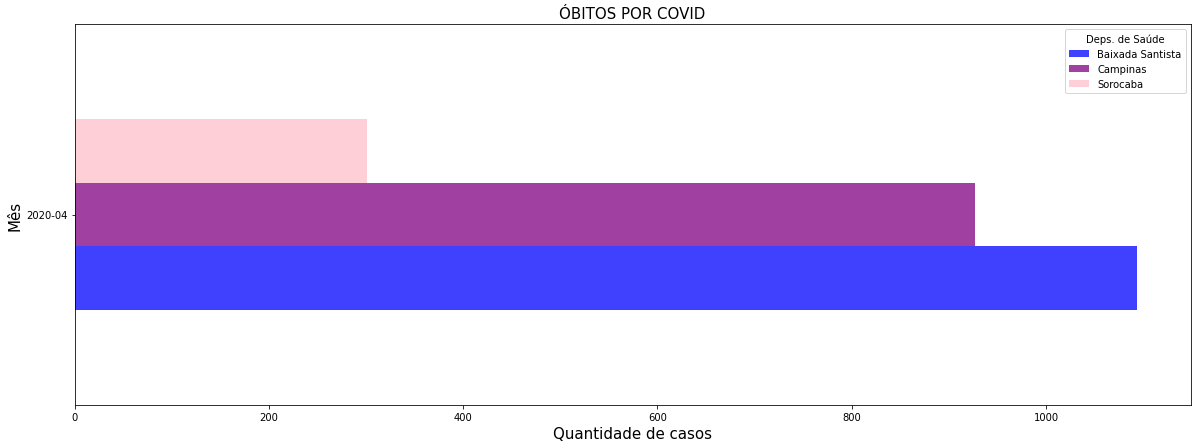

In [80]:
ax1 = table2[['Baixada Santista', 'Campinas', 'Sorocaba']].plot(kind='barh', figsize=(20,7), color=['blue', 'purple', 'pink'], alpha=.75)
ax1.set_xlabel('Quantidade de casos', size = 15)
ax1.set_ylabel('Mês', size = 15)
ax1.legend(title='Deps. de Saúde', fontsize=10)
ax1.set_title('ÓBITOS POR COVID', size=15)

## Exercício 2

**a)** Utilizando a base de dados da IBM, crie um histograma para as idades dos funcionários, separando por gênero.

In [58]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2,Life Sciences,1,2,...,11,3,1,8,0,1.0,6,4,0,5
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1,Life Sciences,2,3,...,23,4,4,10,3,3.0,10,7,1,7
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2,Other,4,4,...,15,3,2,7,3,3.0,0,0,0,0
3,33,No,Travel_Frequently,1392.0,Research & Development,NaN,4,Life Sciences,5,4,...,11,3,3,8,3,3.0,8,7,3,0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1,Medical,7,1,...,12,3,4,6,3,3.0,2,2,2,2


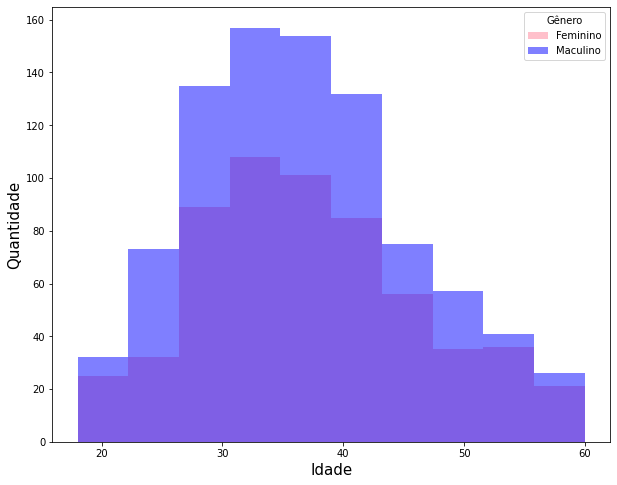

In [81]:
ax2 = df1[df1['Gender'] == 'Female'].plot(y='Age', kind='hist', bins=10, color='pink', label = 'Feminino', figsize=(10,8))
ax3 = df1[df1['Gender'] == 'Male'].plot(y='Age', kind='hist', bins=10, color='blue', alpha=.5, label = 'Maculino', ax=ax2)
ax2.set_xlabel('Idade', size = 15)
ax2.set_ylabel('Quantidade', size = 15)
ax2.legend(title='Gênero', fontsize=10)

**b)** Faça agora um boxplot das idades, por gênero.

<AxesSubplot:title={'center':'Age'}, xlabel='Gender'>

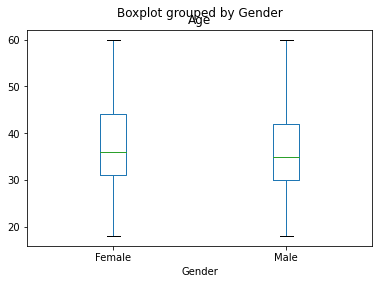

In [74]:
df1.boxplot(column='Age',by='Gender', grid=False)